# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.kaggle.com/datasets/mohamedharris/supermart-grocery-sales-retail-analytics-dataset/data

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the dataframe
df = pd.read_csv('dataset/supermart-sales.csv')
df.info()
df.head()
#df.tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [48]:
# summary statistics
print(df.describe())
print("***********************")

# Create a new dataframe with sales by region
df_order_region = df[['Order ID' ,'Region']]
dfg_order_region = df_order_region.groupby('Region')['Order ID'].nunique().reset_index()
dfg_order_region = dfg_order_region.rename(columns={'Order ID': 'Order count'}).sort_values(by='Order count', ascending=False)
print(dfg_order_region.info())
print(dfg_order_region)
print("***********************")

# Create a new dataframe with sales by city
df_order_city = df[['Order ID' , 'City']]
dfg_order_city = df_order_city.groupby('City')['Order ID'].nunique().reset_index()
dfg_order_city = dfg_order_city.rename(columns={'Order ID': 'Order count'}).sort_values(by='Order count',ascending=False)
print(dfg_order_city.info())
print(dfg_order_city)
print("***********************")

# Create a new dataframe with Category by Profit
df_category_profit = df[['Category' , 'Profit', 'Sales']]
dfg_category_profit['Prof_Per'] = (df_category_profit['Profit'] / (df_category_profit['Sales'] - df_category_profit['Profit'])) * 100
dfg_category_profit = dfg_category_profit.groupby('Category')['Prof_Per'].mean().reset_index()
dfg_category_profit = dfg_category_profit.rename(columns={'Prof_Per': 'Profit Percentage'}).sort_values(by='Profit Percentage',ascending=False)
print(dfg_category_profit.info())
print(dfg_category_profit)
print("***********************")

# Create a new dataframe with highest sales
df_high_sales = df[['Order ID' , 'Sales']]
df_high_sales = df.loc[df['Sales'].idxmax()]
print(df_high_sales)
print("***********************")



             Sales     Discount       Profit
count  9994.000000  9994.000000  9994.000000
mean   1496.596158     0.226817   374.937082
std     577.559036     0.074636   239.932881
min     500.000000     0.100000    25.250000
25%    1000.000000     0.160000   180.022500
50%    1498.000000     0.230000   320.780000
75%    1994.750000     0.290000   525.627500
max    2500.000000     0.350000  1120.950000
***********************
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 4 to 2
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Region       5 non-null      object
 1   Order count  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 120.0+ bytes
None
    Region  Order count
4     West         3203
1     East         2848
0  Central         2323
3    South         1619
2    North            1
***********************
<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 6 to 20
Data columns (total

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

    Region  Order count
4     West         3203
1     East         2848
0  Central         2323
3    South         1619
2    North            1


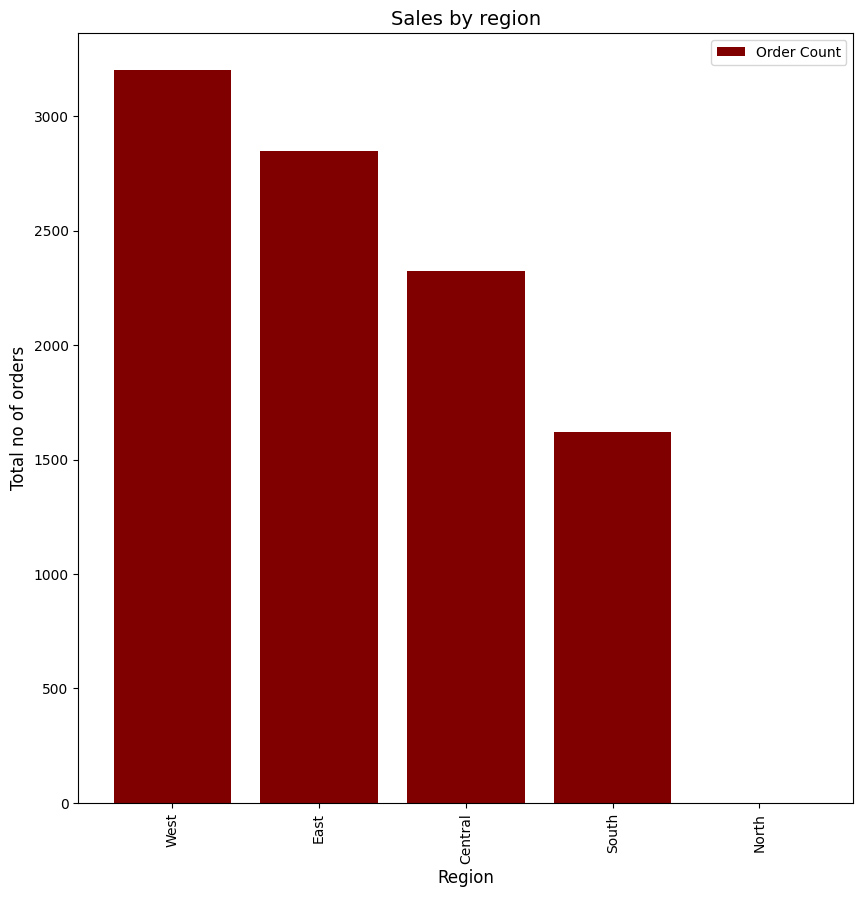

              City  Order count
6      Kanyakumari          459
19     Tirunelveli          446
0             Bodi          442
8      Krishnagiri          440
21         Vellore          435
13      Perambalur          434
1          Chennai          432
17         Tenkasi          432
16           Salem          431
7            Karur          430
14      Pudukottai          430
2       Coimbatore          428
15  Ramanadhapuram          421
3           Cumbum          417
23    Virudhunagar          416
9          Madurai          408
12            Ooty          404
11        Namakkal          403
22      Viluppuram          397
5         Dindigul          396
18           Theni          387
4       Dharmapuri          376
10       Nagercoil          373
20          Trichy          357


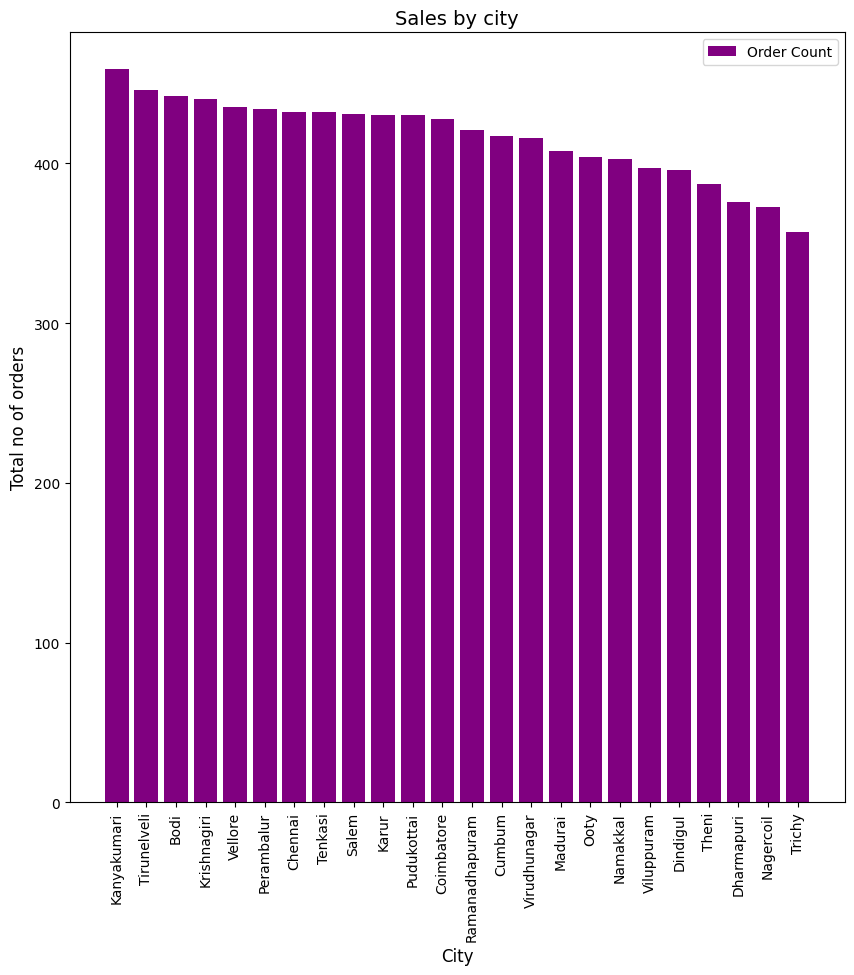

In [49]:
#dataframe with sales by region 
print(dfg_order_region)

plt.figure(figsize=(10, 10))
plt.bar(dfg_order_region['Region'], dfg_order_region['Order count'], color='maroon', label='Order Count')
plt.title('Sales by region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total no of orders', fontsize=12)
plt.xticks(rotation=90)
plt.legend()
plt.show()

#dataframe with sales by city
print(dfg_order_city)

plt.figure(figsize=(10, 10))
plt.bar(dfg_order_city['City'], dfg_order_city['Order count'], color='purple', label='Order Count')
plt.title('Sales by city', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total no of orders', fontsize=12)
plt.xticks(rotation=90)
plt.legend()
plt.show()


## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset?
   Orders are not evenly distributed across the entire region.North region got one order while other region got thousands of orders.
3. Do you have any concerns about your dataset?
   Date column does not have the consistant format.
5. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data?
   Need to clean the date column since the format of date is not consistant.